# Processing

## Sequence processing

- Next-generation sequencing produces a large amount of sequence data
- However, these data are not ideal
  - Sequencing errors
  - PCR bias
- Sequence processing is a vital part of the workflow

## Steps

- QC
  - Are the sequences high enough quality?
- Read merging
  - Paired end reads need to be merged into a single read
- Processing of barcodes
  - Demultiplexing samples on the basis of MIDs
  - Identifying unique templates on the basis of UMIs

## Software for processing

- Many tools for processing of sequence reads:
  - Trimmomatic, fastuniq
- Some have been developed with repertoire sequencing in mind:
  - pRESTO, MIGEC

## pRESTO

- Python library developed at the Kleinstein laboratory
- Advantages
  - Multiplatform and easy to install
  - Well documented
  - Highly configurable
  - Can use multiple threads
- Python can be slow compared to compiled languages

## Example: Jiang et al. (2013) data

- One of the worked examples in the pRESTO documentation
  - [http://presto.readthedocs.io/en/latest/workflows/Jiang2013_Workflow.html](http://presto.readthedocs.io/en/latest/workflows/Jiang2013_Workflow.html)
- Roche 454 sequencing of human IGH
- Multiplexed using MID tags

## Read configuration

![](Jiang2013_ReadConfiguration.svg)

## Workflow

![](Jiang2013_Flowchart.svg)

## Downloading the data from SRA

- For this example, we already know the run accession, so we can download directly.

In [1]:
!fastq-dump SRR765688

Read 277826 spots for SRR765688
Written 277826 spots for SRR765688


## Filtering by length

- Sequences are filted by length using the `FilterSeq.py length` command.

In [2]:
!FilterSeq.py length -s SRR765688.fastq -n 300 --outname SRR765688 --log SRR765688.length.log

     START> FilterSeq
   COMMAND> length
      FILE> SRR765688.fastq
     INNER> False
MIN_LENGTH> 300
     NPROC> 4

PROGRESS> 22:39:02 [####################] 100% (277,826) 1.3 min

   OUTPUT> SRR765688_length-pass.fastq
SEQUENCES> 277826
     PASS> 138107
     FAIL> 139719
      END> FilterSeq



## Length distribution

- The log produced can be parsed into a table using `ParseLog.py -l SRR765688.length.log -f ID LENGTH`.

In [3]:
!ParseLog.py -l SRR765688.length.log -f ID LENGTH

START> ParseLog
 FILE> SRR765688.length.log

PROGRESS> 22:39:05 (277826) 0.0 min

 OUTPUT> SRR765688.length_table.tab
RECORDS> 277826
   PASS> 277826
   FAIL> 0
    END> ParseLog



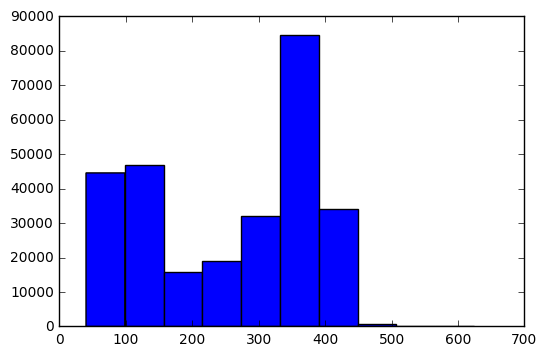

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
fsl=pd.read_csv("SRR765688.length_table.tab",sep="\t")
plt.hist(fsl["LENGTH"])
plt.show()

In [5]:
!head SRR765688_length-pass.fastq

@SRR765688.2 HQP9GKT01DKDXX length=316
AGTGCTACGAGGTGCAGCTGGTGGAGTCTGGGGGAGACGTGGTCCAGCCTGGGAGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCAGCTTCACCAACTATGCTATGCACTGGGTCCGCCAGGGTCCAGGCAAGGGGCTGGAGTGGGTGGCTTTGATTTCATATGATGGAAGCACTAAATTGTACGCAGACTCCGTGAAGGGCCGATTCACCATCTCCAGTGACATTTCCAAGAACACCCTGTATCTGCAAATGAACAGCCTGAGCGCTGACGACACGGCTGTTTATTACTGTGTGAGAGACAGGGTAGGGGG
+
FFFFFFFFFFFIIIIIIIIIIIFDBBBBA3333354BBABBDHIIIIIIIHHFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF888<ADADDD???AFFFFFFFFADBBFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF??:::ABBA313::DA:::ABDDDD:::?????????AFFFFFFFFFFFDCCDDDBBA;4444889444<;:::ABDDDDDA?CCCG555?DDDDDA???DDD=:::?DA544<?8840//008><<9<===88966.,-1...,,
@SRR765688.28 HQP9GKT01AIGIR length=416
AGTCGAGAGAGGGAATTCTCACAGGAGACGAGGGGAAGGGTAGGGCGGAGTGCACTCCTCGAGGAGACGGTGACCAGGGTTCCTCGGCCCACGTAGTCAAGCCAATAATAACTACCCGAACCACTAGTAATCCGAACTTCGTCTGGCACAGTAATACACGGCCGTGTCCGCGGCGGTCACAGAGCTCAGCTTCAGGGAGAACTGGTTCTTGGACCTGTCTACTGATATGGTGACTCGACTCTTGAGGGACGGGTTGTAGTAGGTGCTCCCACTATGATAGATGTA

## Filtering by (mean) quality

- Sequences with mean Phred score less than a threshold are also excluded using `FilterSeq.py quality`.

In [6]:
!FilterSeq.py quality -s SRR765688_length-pass.fastq -q 20 --outname SRR765688 --log SRR765688.quality.log

   START> FilterSeq
 COMMAND> quality
    FILE> SRR765688_length-pass.fastq
   INNER> False
MIN_QUAL> 20.0
   NPROC> 4

PROGRESS> 22:39:57 [####################] 100% (138,107) 0.8 min

   OUTPUT> SRR765688_quality-pass.fastq
SEQUENCES> 138107
     PASS> 138096
     FAIL> 11
      END> FilterSeq



## Distribution by quality

In [7]:
!ParseLog.py -l SRR765688.quality.log -f ID QUALITY

START> ParseLog
 FILE> SRR765688.quality.log

PROGRESS> 22:39:59 (138107) 0.0 min

 OUTPUT> SRR765688.quality_table.tab
RECORDS> 138107
   PASS> 138107
   FAIL> 0
    END> ParseLog



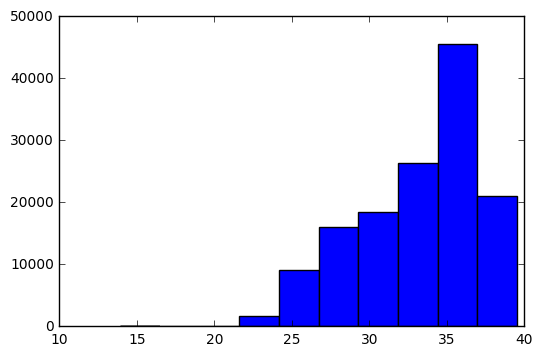

In [8]:
fsq=pd.read_csv("SRR765688.quality_table.tab",sep="\t")
plt.hist(fsq["QUALITY"])
plt.show()

In [9]:
!head SRR765688_quality-pass.fastq

@SRR765688.68 HQP9GKT01C7HPI length=312
AGTCGAGAGAGGCTCAGGACTGGTGAAGCCTTCACAGACCCTGTCCCTCACCTGCACTGTCTCTGGTGGCTCCATCAGCAGTGGTGGTTACTACTGGAGCTGGATCCGCCAACACCCAGGGAAGGGCCTGGAGTGGATTGGGTACATCTATTACAGTGGGAGCACCTACTACAACCCGTCCCTCAAGAGTCGAGTTACCATATCAGTAGACACGTCTAAGAACCAGTTCTCCCTGAAGCTGAGCTCTGTGACTGCCGCGGACACGGCCGTGTATTACTGTGCGAGAGATCAGGGGGAGGGTGGTTCGACCCC
+
FFFFFFFFFFFIIIIIIIIIIIIIIIIIIIIIIIIIIIHHHIIIHHHIIIIIFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFDDDFCC?D?FFFF888@@FFFFFFFFFFF@@@FFFFFFFFFFFFFFFFFFFFFFFFFFFFDDBB===5511168BBBBBDFFFFFFFFFFFFFFFFFFFFFFFDDDFFFFFDAAAADD?6666?AFFFFFFFFFFFFFF;:::DDDAA555?DCCCDDGGGGGGGDDDGDD???DCDC???77522<11.4/-..957....
@SRR765688.184 HQP9GKT01DZ35R length=324
AGTCGAGAGAGGTGCAGCTGGTGGAGTCCGGAGCAGAGGTGAAAAAGCCCGGGAGGTCTCTGAGGATCTCCTGTAAGGGTTCAGGATACAGGTTTACCTAACACTGGATCAGCTGGGTGCGCCAGATGCCCGGGAAAGGCCTGGAGTGGATGGGGAGGATTGATCCTAGTGACTCTTATACCAGCTACAGCCCGTCCTTCCAAGGCCACATCACCATCTCAGGCTGACAAGTCCATCAGCACTGCCTACCTGCAGTGGAGCAGCCTGAAGGCCTCGGACACCGCCATGTAT

## Cutting MIDs

- MIDs can be cut or masked from the sequences using `MaskPrimers.py`
- If we know where the primers start, we can use a simple scoring approach rather than full alignment.

In [10]:
!MaskPrimers.py score -s SRR765688_quality-pass.fastq -p SRR765688_MIDs.fasta \
  --start 0 --maxerror 0.1 --mode cut --outname SRR765688-MID --log SRR765688.MID.log

      START> MaskPrimers
    COMMAND> score
   SEQ_FILE> SRR765688_quality-pass.fastq
PRIMER_FILE> SRR765688_MIDs.fasta
       MODE> cut
    BARCODE> False
  MAX_ERROR> 0.1
  START_POS> 0
 REV_PRIMER> False
      NPROC> 4

PROGRESS> 22:41:10 [####################] 100% (138,096) 1.1 min

   OUTPUT> SRR765688-MID_primers-pass.fastq
SEQUENCES> 138096
     PASS> 137087
     FAIL> 1009
      END> MaskPrimers



In [11]:
!ParseLog.py -l SRR765688.MID.log -f ID PRSTART PRIMER ERROR

START> ParseLog
 FILE> SRR765688.MID.log

PROGRESS> 22:41:13 (138096) 0.0 min

 OUTPUT> SRR765688.MID_table.tab
RECORDS> 138096
   PASS> 138096
   FAIL> 0
    END> ParseLog



In [12]:
mid=pd.read_csv("SRR765688.MID_table.tab",sep="\t")
mid["PRIMER"].value_counts()

MID54    72900
MID53    64188
MID52      996
MID51       12
Name: PRIMER, dtype: int64

In [13]:
!head SRR765688-MID_primers-pass.fastq

@SRR765688.184 HQP9GKT01DZ35R length=324|SEQORIENT=F|PRIMER=MID53
GGTGCAGCTGGTGGAGTCCGGAGCAGAGGTGAAAAAGCCCGGGAGGTCTCTGAGGATCTCCTGTAAGGGTTCAGGATACAGGTTTACCTAACACTGGATCAGCTGGGTGCGCCAGATGCCCGGGAAAGGCCTGGAGTGGATGGGGAGGATTGATCCTAGTGACTCTTATACCAGCTACAGCCCGTCCTTCCAAGGCCACATCACCATCTCAGGCTGACAAGTCCATCAGCACTGCCTACCTGCAGTGGAGCAGCCTGAAGGCCTCGGACACCGCCATGTATTACTGTGCGAGACATCTTGTCCGATATGATGCC
+
FIIIIIIIIIIIIIIIIIIIIIIIIIHFFDD77777A333===A><??FFFFFFCDDDFFFCAABA<==81000.679:911,,,2--,--112=96799<==B===A<AABAA?BA?;8800088800449887;=;;=:00000..6;<==988:=A===<<<ABBAA=::::=BAA?;444<77<<66244488><<<>>=>??@@?9889?999=<<<==BBBBAAADAC:::ABAAAA<998898?><867:662222900000=>>?>>?@<==:889898?<==?A???AAB=5548<:99997---
@SRR765688.139 HQP9GKT01BRK5Z length=328|SEQORIENT=F|PRIMER=MID53
TGGAGCTGAGTGAAGAAGCCTGGTCCTCGGTGAAGGTCTCCTGCAAGGCTTTCTGGAGGCACCTTCAGCAGCTATGCTATCAGCTGGGTNCGACAGGCCCCTGGACAAGGCTTGAGTGGATGGGAAGGATCATCCCTATCCTTGGTATAGCAAACTACGCACAGAAGTTTCCAGGGCANAGTCACGATTACCGCGGACAAAATCCACGAGCACAGCCTTACATGGAGCTGAGCAGC

## Masking forward primers

- Aligns primers against sequence
- Corrections orientation such that all sequences are in the direction of the V(D)J reading frame

In [14]:
!MaskPrimers.py align -s SRR765688-MID_primers-pass.fastq -p SRX190717_VPrimers.fasta \
    --maxlen 50 --maxerror 0.3 --mode mask --outname SRR765688-FWD --log SRR765688.FWD.log

      START> MaskPrimers
    COMMAND> align
   SEQ_FILE> SRR765688-MID_primers-pass.fastq
PRIMER_FILE> SRX190717_VPrimers.fasta
       MODE> mask
    BARCODE> False
  MAX_ERROR> 0.3
    MAX_LEN> 50
 REV_PRIMER> False
    SKIP_RC> False
GAP_PENALTY> 1, 1
      NPROC> 4

PROGRESS> 23:22:05 [####################] 100% (137,087) 40.9 min

   OUTPUT> SRR765688-FWD_primers-pass.fastq
SEQUENCES> 137087
     PASS> 105746
     FAIL> 31341
      END> MaskPrimers



In [15]:
!ParseLog.py -l SRR765688.FWD.log -f ID PRSTART PRIMER ERROR

START> ParseLog
 FILE> SRR765688.FWD.log

PROGRESS> 23:22:11 (137087) 0.1 min

 OUTPUT> SRR765688.FWD_table.tab
RECORDS> 137087
   PASS> 137087
   FAIL> 0
    END> ParseLog



In [16]:
fwd=pd.read_csv("SRR765688.FWD_table.tab",sep="\t")
fwd["PRIMER"].value_counts()

LR5     20893
LR9     17915
LR2     17355
LR11    14701
LR7     14468
LR3     12786
LR1     11886
LR10     7744
LR6      7347
LR4      6547
LR8      5445
Name: PRIMER, dtype: int64

In [17]:
!head SRR765688-FWD_primers-pass.fastq

@SRR765688.2 HQP9GKT01DKDXX length=316|SEQORIENT=F,F|PRIMER=MID54,LR11
NNNNNNNNNNNNNNNNNNTGGGGGAGACGTGGTCCAGCCTGGGAGGTCCCTGAGACTCTCCTGTGCAGCCTCTGGATTCAGCTTCACCAACTATGCTATGCACTGGGTCCGCCAGGGTCCAGGCAAGGGGCTGGAGTGGGTGGCTTTGATTTCATATGATGGAAGCACTAAATTGTACGCAGACTCCGTGAAGGGCCGATTCACCATCTCCAGTGACATTTCCAAGAACACCCTGTATCTGCAAATGAACAGCCTGAGCGCTGACGACACGGCTGTTTATTACTGTGTGAGAGACAGGGTAGGGGG
+
!!!!!!!!!!!!!!!!!!A3333354BBABBDHIIIIIIIHHFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF888<ADADDD???AFFFFFFFFADBBFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF??:::ABBA313::DA:::ABDDDD:::?????????AFFFFFFFFFFFDCCDDDBBA;4444889444<;:::ABDDDDDA?CCCG555?DDDDDA???DDD=:::?DA544<?8840//008><<9<===88966.,-1...,,
@SRR765688.184 HQP9GKT01DZ35R length=324|SEQORIENT=F,F|PRIMER=MID53,LR11
NNNNNNNNNNNNNNNNNNCGGAGCAGAGGTGAAAAAGCCCGGGAGGTCTCTGAGGATCTCCTGTAAGGGTTCAGGATACAGGTTTACCTAACACTGGATCAGCTGGGTGCGCCAGATGCCCGGGAAAGGCCTGGAGTGGATGGGGAGGATTGATCCTAGTGACTCTTATACCAGCTACAGCCCGTCCTTCCAAGGCCACATCACCATCTCAGGCTGACAAGTCCATCAGCACTGCCTACC

## Masking reverse primers

In [18]:
!MaskPrimers.py align -s SRR765688-FWD_primers-pass.fastq -p SRX190717_CPrimers.fasta \
    --maxlen 50 --maxerror 0.3 --revpr --skiprc --mode cut \
    --outname SRR765688-REV --log SRR765688.REV.log

      START> MaskPrimers
    COMMAND> align
   SEQ_FILE> SRR765688-FWD_primers-pass.fastq
PRIMER_FILE> SRX190717_CPrimers.fasta
       MODE> cut
    BARCODE> False
  MAX_ERROR> 0.3
    MAX_LEN> 50
 REV_PRIMER> True
    SKIP_RC> True
GAP_PENALTY> 1, 1
      NPROC> 4

PROGRESS> 23:55:39 [####################] 100% (105,746) 33.4 min

   OUTPUT> SRR765688-REV_primers-pass.fastq
SEQUENCES> 105746
     PASS> 56136
     FAIL> 49610
      END> MaskPrimers



In [19]:
!head SRR765688-REV_primers-pass.fastq

@SRR765688.28 HQP9GKT01AIGIR length=416|SEQORIENT=F,RC,F|PRIMER=MID53,LR7,IgM-PCR
NNNNNNNNNNNNNNNNNNNNCCCTGTCCCTCACCTGCAACTGTCTCTGGTGGCTCCGTCAGCAGTGGTAGTTACTACTGGAGCTGGATTCCGGCAGCCCCAGGGAAGGGCCTGGAGTGGATTGGGTACATCTATCATAGTGGGAGCACCTACTACAACCCGTCCCTCAAGAGTCGAGTCACCATATCAGTAGACAGGTCCAAGAACCAGTTCTCCCTGAAGCTGAGCTCTGTGACCGCCGCGGACACGGCCGTGTATTACTGTGCCAGACGAAGTTCGGATTACTAGTGGTTCGGGTAGTTATTATTGGCTTGACTACGTGGGCCGAGGAACCCTGGTCACCGTCTCCTCGAGGAGTGCACTCCGCCCTACCCTTCCCCT
+
!!!!!!!!!!!!!!!!!!!!44=B?>888@=///DDD???DDDDD?>>DDDDDDDIDDDIDDDIIIDDDDIIDDDAAADDDDDDDA:4422;9933,,,,1,,,55,,,66768>=>889>A==::8<=BBAA<4444<?111998?ABBBBDD>CC;;FFFF???ADDDDDDD??;;;FFFFFFFFF?;;;CFDD?:::BBBB@889<>>:?444?::::BBA??@FFFFFFFFFF<<::::AAAA====B===BBAAA@<99866613---112/.--59876755,,..31,,,-35597242688942469<<=..,,,11,,----,,,/-14141743232244=84249::8:7:,,/,,,,/,,,55,,..9
@SRR765688.200 HQP9GKT01DRKX5 length=362|SEQORIENT=F,F,F|PRIMER=MID53,LR5,IgA-PCR
NNNNNNNNNNNNNNNNNNNNNCCGGGCAGTCTCTGAAGATCTCGTGTAAGGATTCTGGATACAACTTTGCCA

In [20]:
!ParseLog.py -l SRR765688.REV.log -f ID PRSTART PRIMER ERROR

START> ParseLog
 FILE> SRR765688.REV.log

PROGRESS> 23:55:53 (105746) 0.2 min

 OUTPUT> SRR765688.REV_table.tab
RECORDS> 105746
   PASS> 105746
   FAIL> 0
    END> ParseLog



## Frequency of reverse primers

In [21]:
rev=pd.read_csv("SRR765688.REV_table.tab",sep="\t")
rev["PRIMER"].value_counts()

IgM-PCR    30132
IgG-PCR    28881
IgA-PCR    21868
IgD-PCR    16291
IgE-PCR     8574
Name: PRIMER, dtype: int64

## Editing the sequence headers

In [22]:
!head SRR765688-REV_primers-pass.fastq

@SRR765688.28 HQP9GKT01AIGIR length=416|SEQORIENT=F,RC,F|PRIMER=MID53,LR7,IgM-PCR
NNNNNNNNNNNNNNNNNNNNCCCTGTCCCTCACCTGCAACTGTCTCTGGTGGCTCCGTCAGCAGTGGTAGTTACTACTGGAGCTGGATTCCGGCAGCCCCAGGGAAGGGCCTGGAGTGGATTGGGTACATCTATCATAGTGGGAGCACCTACTACAACCCGTCCCTCAAGAGTCGAGTCACCATATCAGTAGACAGGTCCAAGAACCAGTTCTCCCTGAAGCTGAGCTCTGTGACCGCCGCGGACACGGCCGTGTATTACTGTGCCAGACGAAGTTCGGATTACTAGTGGTTCGGGTAGTTATTATTGGCTTGACTACGTGGGCCGAGGAACCCTGGTCACCGTCTCCTCGAGGAGTGCACTCCGCCCTACCCTTCCCCT
+
!!!!!!!!!!!!!!!!!!!!44=B?>888@=///DDD???DDDDD?>>DDDDDDDIDDDIDDDIIIDDDDIIDDDAAADDDDDDDA:4422;9933,,,,1,,,55,,,66768>=>889>A==::8<=BBAA<4444<?111998?ABBBBDD>CC;;FFFF???ADDDDDDD??;;;FFFFFFFFF?;;;CFDD?:::BBBB@889<>>:?444?::::BBA??@FFFFFFFFFF<<::::AAAA====B===BBAAA@<99866613---112/.--59876755,,..31,,,-35597242688942469<<=..,,,11,,----,,,/-14141743232244=84249::8:7:,,/,,,,/,,,55,,..9
@SRR765688.200 HQP9GKT01DRKX5 length=362|SEQORIENT=F,F,F|PRIMER=MID53,LR5,IgA-PCR
NNNNNNNNNNNNNNNNNNNNNCCGGGCAGTCTCTGAAGATCTCGTGTAAGGATTCTGGATACAACTTTGCCA

In [23]:
!ParseHeaders.py expand -s SRR765688-REV_primers-pass.fastq -f PRIMER

  START> ParseHeaders
COMMAND> expand
   FILE> SRR765688-REV_primers-pass.fastq
 FIELDS> PRIMER

PROGRESS> 23:56:37 [####################] 100% (56,136) 0.7 min

   OUTPUT> SRR765688-REV_primers-pass_reheader.fastq
SEQUENCES> 56136
      END> ParseHeaders



In [24]:
!head SRR765688-REV_primers-pass_reheader.fastq

@SRR765688.28 HQP9GKT01AIGIR length=416|SEQORIENT=F,RC,F|PRIMER1=MID53|PRIMER2=LR7|PRIMER3=IgM-PCR
NNNNNNNNNNNNNNNNNNNNCCCTGTCCCTCACCTGCAACTGTCTCTGGTGGCTCCGTCAGCAGTGGTAGTTACTACTGGAGCTGGATTCCGGCAGCCCCAGGGAAGGGCCTGGAGTGGATTGGGTACATCTATCATAGTGGGAGCACCTACTACAACCCGTCCCTCAAGAGTCGAGTCACCATATCAGTAGACAGGTCCAAGAACCAGTTCTCCCTGAAGCTGAGCTCTGTGACCGCCGCGGACACGGCCGTGTATTACTGTGCCAGACGAAGTTCGGATTACTAGTGGTTCGGGTAGTTATTATTGGCTTGACTACGTGGGCCGAGGAACCCTGGTCACCGTCTCCTCGAGGAGTGCACTCCGCCCTACCCTTCCCCT
+
!!!!!!!!!!!!!!!!!!!!44=B?>888@=///DDD???DDDDD?>>DDDDDDDIDDDIDDDIIIDDDDIIDDDAAADDDDDDDA:4422;9933,,,,1,,,55,,,66768>=>889>A==::8<=BBAA<4444<?111998?ABBBBDD>CC;;FFFF???ADDDDDDD??;;;FFFFFFFFF?;;;CFDD?:::BBBB@889<>>:?444?::::BBA??@FFFFFFFFFF<<::::AAAA====B===BBAAA@<99866613---112/.--59876755,,..31,,,-35597242688942469<<=..,,,11,,----,,,/-14141743232244=84249::8:7:,,/,,,,/,,,55,,..9
@SRR765688.200 HQP9GKT01DRKX5 length=362|SEQORIENT=F,F,F|PRIMER1=MID53|PRIMER2=LR5|PRIMER3=IgA-PCR
NNNNNNNNNNNNNNNNNNNNNCCGGGCAGTCTCTGAAG

In [25]:
!ParseHeaders.py rename -s SRR765688-REV_primers-pass_reheader.fastq -f PRIMER1 PRIMER2 PRIMER3 \
    -k MID VPRIMER CPRIMER --outname SRR765688

  START> ParseHeaders
COMMAND> rename
   FILE> SRR765688-REV_primers-pass_reheader.fastq
ACTIONS> None
 FIELDS> PRIMER1,PRIMER2,PRIMER3
  NAMES> MID,VPRIMER,CPRIMER

PROGRESS> 23:57:23 [####################] 100% (56,136) 0.7 min

   OUTPUT> SRR765688_reheader.fastq
SEQUENCES> 56136
      END> ParseHeaders



In [26]:
!head SRR765688_reheader.fastq

@SRR765688.28 HQP9GKT01AIGIR length=416|SEQORIENT=F,RC,F|MID=MID53|VPRIMER=LR7|CPRIMER=IgM-PCR
NNNNNNNNNNNNNNNNNNNNCCCTGTCCCTCACCTGCAACTGTCTCTGGTGGCTCCGTCAGCAGTGGTAGTTACTACTGGAGCTGGATTCCGGCAGCCCCAGGGAAGGGCCTGGAGTGGATTGGGTACATCTATCATAGTGGGAGCACCTACTACAACCCGTCCCTCAAGAGTCGAGTCACCATATCAGTAGACAGGTCCAAGAACCAGTTCTCCCTGAAGCTGAGCTCTGTGACCGCCGCGGACACGGCCGTGTATTACTGTGCCAGACGAAGTTCGGATTACTAGTGGTTCGGGTAGTTATTATTGGCTTGACTACGTGGGCCGAGGAACCCTGGTCACCGTCTCCTCGAGGAGTGCACTCCGCCCTACCCTTCCCCT
+
!!!!!!!!!!!!!!!!!!!!44=B?>888@=///DDD???DDDDD?>>DDDDDDDIDDDIDDDIIIDDDDIIDDDAAADDDDDDDA:4422;9933,,,,1,,,55,,,66768>=>889>A==::8<=BBAA<4444<?111998?ABBBBDD>CC;;FFFF???ADDDDDDD??;;;FFFFFFFFF?;;;CFDD?:::BBBB@889<>>:?444?::::BBA??@FFFFFFFFFF<<::::AAAA====B===BBAAA@<99866613---112/.--59876755,,..31,,,-35597242688942469<<=..,,,11,,----,,,/-14141743232244=84249::8:7:,,/,,,,/,,,55,,..9
@SRR765688.200 HQP9GKT01DRKX5 length=362|SEQORIENT=F,F,F|MID=MID53|VPRIMER=LR5|CPRIMER=IgA-PCR
NNNNNNNNNNNNNNNNNNNNNCCGGGCAGTCTCTGAAGATCTCGTG

## Deduplication

In [27]:
!CollapseSeq.py -s SRR765688_reheader.fastq -n 20 --inner --uf MID CPRIMER \
    --cf VPRIMER --act set --outname SRR765688

       START> CollapseSeq
        FILE> SRR765688_reheader.fastq
 MAX_MISSING> 20
 UNIQ_FIELDS> MID,CPRIMER
 COPY_FIELDS> VPRIMER
COPY_ACTIONS> set
   MAX_FIELD> None
   MIN_FIELD> None
       INNER> True
KEEP_MISSING> False

MISSING>  0
PROGRESS> 23:57:49 [####################] 100% (56,136) 0.2 min

MISSING>  1
PROGRESS> 00:01:01 [####################] 100% (1,787) 3.2 min

MISSING>  2
PROGRESS> 00:01:17 [####################] 100% (152) 0.3 min

MISSING>  3
PROGRESS> 00:01:20 [####################] 100% (22) 0.0 min

      OUTPUT> SRR765688_collapse-unique.fastq
   SEQUENCES> 56136
      UNIQUE> 48647
   DUPLICATE> 7489
UNDETERMINED> 0
         END> CollapseSeq



In [28]:
!head SRR765688_collapse-unique.fastq

@SRR765688.266977 HQP9GKT02JF1W5 length=390|SEQORIENT=F,RC,F|MID=MID54|CPRIMER=IgM-PCR|VPRIMER=LR9|DUPCOUNT=1
NNNNNNNNNNNNNNNNNNNNNAAGCCTGGGGCCTCAGTGAAGGTCTCCTGCAAGGCTTCTGGTTACACCTTTACCAGCTACGGTATCAGCTGGGTGCGACAGGCCCCTGGACAAGGGCTTGAGTGGATGGGATGGATCAGCGCTTACAATGGTAACACAAACTATGCACAGAAGCTCCAGGGCAGAGTCACCATGACCACAGACACATCCACGAGCACAGCCTACATGGAGCTGAGGAGCCTGAGATCTGACGACACGGCCGTGTATTACTGATTCACGCCTGGTATAACTGGAAACTGGGGCCAGGGAACCCTGGTCACCGTCTCCTCAGGGAGTGCATCCGCCCAACCCTTTCCCCCT
+
!!!!!!!!!!!!!!!!!!!!!99557A2224AAIGEEEIIIIIIDDCIHHHHHIIIIIIHHHIIIII99===?IIIIIIIIIIIIIIIIIICCCIIIHEEICC====EEEIIIIIIHIIIIIIIIIIICCCHIIIIIIIIIIIIIIIIIIIIIIIIIHGHHIIIIDDDHIIIIIIIIII;;;IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIHHHIICCCCIII???HHHHHIIIIIIIIIIIIIIIIIHHHIIIIIIIIII644IE<;;55579999I
@SRR765688.239596 HQP9GKT02HO885 length=393|SEQORIENT=F,F,F|MID=MID53|CPRIMER=IgA-PCR|VPRIMER=LR4|DUPCOUNT=1
NNNNNNNNNNNNNNNNNNNCTTCGGAGACCCTGTCCCTCACCTGCCTTGTCTCTGGT

## Conclusions

- Toolkits like pRESTO can be used to clean repseq datasets
- Need quite detailed information on the experimental setup
  - Read configuration
  - Forward and reverse primers
  - MIDs
  - UMIs
  - Metadata
- Turn single or paired end FASTQ files into 'cleaned' FASTQ with additional annotations
- At this point, some additional filtering can be performed
  - Exclude single sequences?